In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer  # For converting text data into numerical feature vectors
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into numerical values
from sklearn.metrics import accuracy_score, f1_score  # For evaluating model performance using accuracy and F1-score
from scipy.sparse import hstack  # For stacking sparse matrices horizontally
import joblib  # For saving trained models to disk
import pickle  # For serializing Python objects to disk

In [ ]:
import numpy as np  # Importing NumPy for numerical computing
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for statistical data visualization
import warnings  # Importing warnings to handle warnings during execution

# Ignoring warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

In [ ]:
# Classification
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier from sklearn.tree
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from sklearn.ensemble
from sklearn.neural_network import MLPClassifier  # Importing MLPClassifier from sklearn.neural_network

In [ ]:
# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale  # Importing Normalizer and scale from sklearn.preprocessing
from sklearn.model_selection import train_test_split  # Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, cross_validate  # Importing GridSearchCV, KFold, cross_val_score, and cross_validate from sklearn.model_selection


In [ ]:
# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder  # Importing MinMaxScaler, StandardScaler, and LabelEncoder from sklearn.preprocessing

# Classification Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix  # Importing various classification metrics from sklearn.metrics


In [ ]:
df = pd.read_csv('Traffic_Accident_dataset.csv')

In [ ]:
df.head()

,Accident_area,Sex_of_Casualty,Age_of_Casualty,Driver_education,Driver_Sex,Cause_of_Accident,Accide_type,Road_type,Road_Geometry,Road_Condition,Driver_experiance,vehicle_type,Vichle_Service,Road_Surface,Weather_Condition,Light_Condition,time,Driver_age,Accident_Factor
0,1,0,0.478723,3,1,5,3,0,3,0,10,16,0.478723,0,2,0,2,0.520833,1
1,1,0,0.244681,3,1,3,3,0,3,0,11,11,0.244681,0,2,0,2,0.583333,0
2,0,0,0.382979,3,1,5,3,0,3,0,10,7,0.382979,0,2,0,0,0.312500,1
3,1,0,0.297872,3,1,2,1,0,3,0,4,12,0.297872,0,2,0,2,0.166667,1
4,0,1,0.255319,3,1,2,1,0,3,0,4,12,0.255319,0,2,0,2,0.083333,1


In [ ]:
df.tail()

,Accident_area,Sex_of_Casualty,Age_of_Casualty,Driver_education,Driver_Sex,Cause_of_Accident,Accide_type,Road_type,Road_Geometry,Road_Condition,Driver_experiance,vehicle_type,Vichle_Service,Road_Surface,Weather_Condition,Light_Condition,time,Driver_age,Accident_Factor
5245,0,1,0.159574,1,0,7,0,2,4,1,10,10,0.159574,0,1,0,0,0.166667,2
5246,0,1,0.138298,0,1,7,0,0,4,0,10,16,0.138298,3,0,0,0,0.333333,2
5247,0,1,0.723404,0,1,7,0,0,2,1,10,16,0.723404,3,0,0,0,0.187500,2
5248,0,0,0.659574,3,0,5,3,0,0,0,8,8,0.659574,0,0,0,2,0.270833,0
5249,0,0,0.372340,3,1,2,1,0,0,0,8,2,0.372340,3,0,1,1,0.250000,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Accident_area,5250.0,0.785143,0.410762,0.0,1.000000,1.000000,1.000000,1.0
Sex_of_Casualty,5250.0,0.674095,0.468757,0.0,0.000000,1.000000,1.000000,1.0
Age_of_Casualty,5250.0,0.365226,0.186982,0.0,0.223404,0.329787,0.478723,1.0
Driver_education,5250.0,1.849905,1.355874,0.0,0.000000,3.000000,3.000000,3.0
Driver_Sex,5250.0,0.998857,0.033790,0.0,1.000000,1.000000,1.000000,1.0
Cause_of_Accident,5250.0,3.040952,2.138659,0.0,1.000000,2.000000,5.000000,8.0
Accide_type,5250.0,1.061714,1.341485,0.0,0.000000,0.000000,3.000000,3.0
Road_type,5250.0,0.108000,0.425820,0.0,0.000000,0.000000,0.000000,3.0
Road_Geometry,5250.0,2.546095,1.059242,0.0,3.000000,3.000000,3.000000,5.0
Road_Condition,5250.0,0.150857,0.357944,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# X is assigned the first 18 columns of the DataFrame df.
X = df.iloc[:, 0:18]

# Y is assigned the 19th column of the DataFrame df.
Y = df.iloc[:,18]

In [ ]:
X

,Accident_area,Sex_of_Casualty,Age_of_Casualty,Driver_education,Driver_Sex,Cause_of_Accident,Accide_type,Road_type,Road_Geometry,Road_Condition,Driver_experiance,vehicle_type,Vichle_Service,Road_Surface,Weather_Condition,Light_Condition,time,Driver_age
0,1,0,0.478723,3,1,5,3,0,3,0,10,16,0.478723,0,2,0,2,0.520833
1,1,0,0.244681,3,1,3,3,0,3,0,11,11,0.244681,0,2,0,2,0.583333
2,0,0,0.382979,3,1,5,3,0,3,0,10,7,0.382979,0,2,0,0,0.312500
3,1,0,0.297872,3,1,2,1,0,3,0,4,12,0.297872,0,2,0,2,0.166667
4,0,1,0.255319,3,1,2,1,0,3,0,4,12,0.255319,0,2,0,2,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1,0.159574,1,0,7,0,2,4,1,10,10,0.159574,0,1,0,0,0.166667
5246,0,1,0.138298,0,1,7,0,0,4,0,10,16,0.138298,3,0,0,0,0.333333
5247,0,1,0.723404,0,1,7,0,0,2,1,10,16,0.723404,3,0,0,0,0.187500
5248,0,0,0.659574,3,0,5,3,0,0,0,8,8,0.659574,0,0,0,2,0.270833


In [ ]:
Y

0       1
1       0
2       1
3       1
4       1
       ..
5245    2
5246    2
5247    2
5248    0
5249    0
Name: Accident_Factor, Length: 5250, dtype: int64

In [ ]:
## Splitting the data into training and testing sets using train_test_split function
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
mlpc = MLPClassifier(activation='logistic',max_iter=200, alpha=0.01,hidden_layer_sizes=(100, 100, 100),
                        solver = 'adam',random_state=0)

In [ ]:
%%time
mlpc.fit(X_train, y_train)

CPU times: total: 29.3 s
Wall time: 6.21 s


MLPClassifier(activation='logistic', alpha=0.01,
              hidden_layer_sizes=(100, 100, 100), random_state=0)

In [ ]:
mlpc1 = MLPClassifier(activation='logistic',max_iter=200,alpha=0.01,hidden_layer_sizes=(100, 100, 100),
                        solver = 'adam',random_state=0)

In [ ]:
mlpc1.fit(X_test, y_test)

MLPClassifier(activation='logistic', alpha=0.01,
              hidden_layer_sizes=(100, 100, 100), random_state=0)

In [ ]:
# Making predictions on the training data using the MLP model
rf_pred_train = mlpc.predict(X_train)

# Calculating the accuracy score by comparing the predicted labels with the actual labels of the training data
rf_score = accuracy_score(y_train, rf_pred_train)

# Printing the accuracy score
print(rf_score)

# Printing the actual labels of the training data
print(y_train)


0.9148299319727892
3655    1
3653    1
1364    0
408     2
4991    1
       ..
4931    0
3264    0
1653    1
2607    1
2732    1
Name: Accident_Factor, Length: 3675, dtype: int64


In [ ]:
# Making predictions on the testing data using the Multi-Layer Perceptron (MLP) Classifier model
rf_pred = mlpc.predict(X_test)

# Calculating the accuracy score on the testing data by comparing the predicted labels with the actual labels
rf_score_test = accuracy_score(y_test, rf_pred)

# Printing the accuracy score on the testing data
print(rf_score_test)

# Printing the shape of the DataFrame df
df.shape

0.9111111111111111


(5250, 19)

In [ ]:
# Training the MLPClassifier model (mlpc1) using the training data (X_train, y_train)
mlpc1.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.01,
              hidden_layer_sizes=(100, 100, 100), random_state=0)

In [ ]:
# Training the MLPClassifier model (mlpc1) using the training data (X_train, y_train)
mlpc1.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.01,
              hidden_layer_sizes=(100, 100, 100), random_state=0)

In [ ]:
# Predicting the labels of the training data using the trained MLPC model
mlp_pred_train = mlpc.predict(X_train)

# Calculating the accuracy score of the MLPC model on the training data
mlp_score = accuracy_score(y_train, mlp_pred_train)

# Printing the accuracy score of the MLPC model on the training data
print(mlp_score)

# Printing a classification report, which includes precision, recall, F1-score, and support for each class
# This report provides a detailed evaluation of the model's performance on the training data
print(classification_report(y_train, mlp_pred_train))

0.9148299319727892
              precision    recall  f1-score   support

           0       0.84      0.55      0.66       459
           1       0.92      0.98      0.95      2645
           2       0.94      0.97      0.95       303
           3       0.89      0.87      0.88       268

    accuracy                           0.91      3675
   macro avg       0.90      0.84      0.86      3675
weighted avg       0.91      0.91      0.91      3675



In [ ]:
# Calculating precision, recall, and F1-score on the training data using the macro-average method
# The macro-average calculates the metric independently for each class and then takes the average, giving each class equal weight
mlp_precision = precision_score(y_train, mlp_pred_train, average='macro')
mlp_recall = recall_score(y_train, mlp_pred_train, average='macro')
mlp_f1 = f1_score(y_train, mlp_pred_train, average='macro')
# Printing precision, recall, and F1-score on the training data
print(mlp_precision,mlp_recall,mlp_f1)

0.8983784849470395 0.8401390833328387 0.8612485324991992


Training Precision: 0.8983784849470395
Training Recall: 0.8401390833328387
Training F1-score: 0.8612485324991992


Text(0.5, 3.722222222222216, 'Predicted Value')

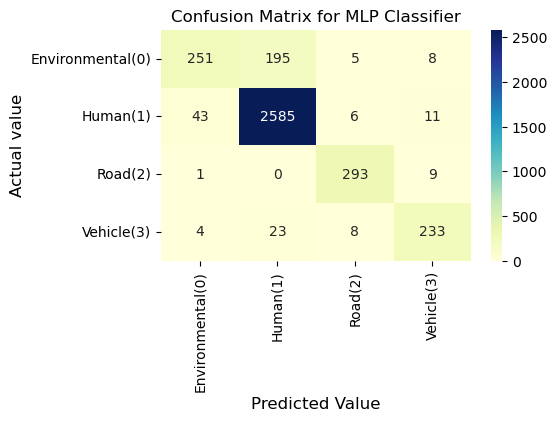

In [ ]:
mlp_precision = precision_score(y_train, mlp_pred_train, average='macro')
mlp_recall = recall_score(y_train, mlp_pred_train, average='macro')
mlp_f1 = f1_score(y_train, mlp_pred_train, average='macro')

# Printing precision, recall, and F1-score on the training data
print("Training Precision:", mlp_precision)
print("Training Recall:", mlp_recall)
print("Training F1-score:", mlp_f1)

# Calculating the confusion matrix for the MLP Classifier on the training data
cm_mlp = confusion_matrix(y_train, mlp_pred_train)

# Creating a DataFrame to visualize the confusion matrix with labeled rows and columns
cm_matrix_mlp = pd.DataFrame(data=cm_mlp,
                             columns=['Environmental(0)', 'Human(1)', 'Road(2)', 'Vehicle(3)'],
                             index=['Environmental(0)', 'Human(1)', 'Road(2)', 'Vehicle(3)'])

# Creating a heatmap to visualize the confusion matrix
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(cm_matrix_mlp, annot=True, fmt='d', cmap='YlGnBu')

# Adding labels and title to the heatmap
plt.ylabel('Actual value', fontsize=12)
plt.title('Confusion Matrix for MLP Classifier', fontsize=12)
plt.xlabel('Predicted Value', fontsize=12)

In [ ]:
from sklearn.neural_network import MLPClassifier  # Importing MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict  # Importing cross-validation functions

# Creating an MLPClassifier model with specified parameters
mlpc = MLPClassifier(activation='relu', max_iter=200, alpha=0.01, hidden_layer_sizes=(100, 100, 100),
                     solver='adam', random_state=0)

# Performing cross-validation using the created MLPClassifier model
# cross_val_score computes the accuracy of the model using cross-validation
cvcross3 = cross_val_score(mlpc, X, Y, cv=10)

# Printing the accuracy scores obtained from cross-validation
print(cvcross3)

# Printing the mean accuracy across all folds
print("Accuracy =", cvcross3.mean())

# Storing the mean accuracy obtained from cross-validation
mlpc_score_cv = cvcross3.mean()

# Performing cross-validated predictions using the MLPClassifier model
# cross_val_predict generates cross-validated estimates for each input data point
y_pred3 = cross_val_predict(mlpc, X, Y, cv=10)

[0.81333333 0.87047619 0.82666667 0.89904762 0.86095238 0.87809524
 0.83238095 0.92190476 0.92952381 0.84380952]
Accuracy = 0.8676190476190475


In [ ]:
# Printing a classification report to evaluate the performance of predicted labels (y_pred3) against the true labels (Y)
# The classification report provides metrics such as precision, recall, F1-score, and support for each class
print(classification_report(y_pred3, Y))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55       590
           1       0.93      0.91      0.92      3866
           2       0.90      0.93      0.92       417
           3       0.79      0.84      0.81       377

    accuracy                           0.87      5250
   macro avg       0.79      0.82      0.80      5250
weighted avg       0.87      0.87      0.87      5250



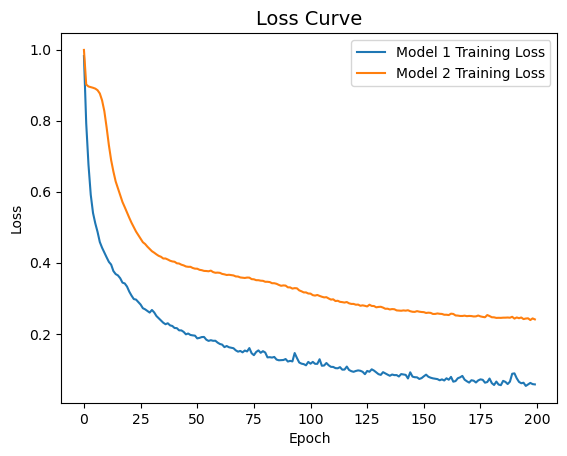

In [ ]:
# Training the MLPClassifier models mlpc and mlpc1
mlpc.fit(X_train, y_train)
mlpc1.fit(X_train, y_train)

# Extracting the loss values from the models
losses_mlpc = mlpc.loss_curve_
losses_mlpc1 = mlpc1.loss_curve_

# Plotting the loss curves of the two models
plt.plot(losses_mlpc, label='Model 1 Training Loss')
plt.plot(losses_mlpc1, label='Model 2 Training Loss')

# Adding title and labels to the plot
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding a legend to differentiate between the two curves
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
import pickle
with open('FinalModelMLP.pkl','wb') as f:
    pickle.dump(rfc,f)

NameError: name 'rfc' is not defined

In [ ]:
prediction_test =rfc.predict(X_test)
print(prediction_test)

In [ ]:
import pickle
loaded_rfc=pickle.load(open('FinalModelMLP.pkl', 'rb'))
loaded_rfc.predict(X_train)

# Decision Tree Clasifier

In [ ]:
df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , random_state=104, train_size=0.7, shuffle=True)

# printing out train and test sets
X

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
X

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
# to use all data for training
# X is assigned the first 18 columns of the DataFrame df.
X = df.iloc[:, 0:18]

# Y is assigned the 19th column of the DataFrame df.
Y = df.iloc[:,18]
# to split the data for training & testing using 80:20 perecntage
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

model = DecisionTreeClassifier() 	 # create model

# train the classifier using 80% train data set
model.fit(X_train,y_train)

plt.figure("Decision Tree",figsize=[12,5])
plot_tree(model,fontsize=10)
plt.show()

# save the model using joblib dump
joblib.dump(model,'decisionTree.model')

In [ ]:
import joblib
joblib.load('decisionTree.model')
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini',max_features=10,max_depth=11,min_samples_leaf=5,random_state=0)
decision_tree.fit(X_train, y_train)

dt_pred_train = decision_tree.predict(X_train)
dt_score=accuracy_score(y_train,dt_pred_train)
print(dt_score)

dt_pred = decision_tree.predict(X_test)
dt_score_test=accuracy_score(y_test,dt_pred)
print(dt_score_test)

#Expermental result for Decision tree algorithm
print("Training Accuracy  ",dt_score)
print("Test Accuracy  ",dt_score_test)
print("classification_report" ,(y_train, dt_pred_train))

In [ ]:
print(classification_report(y_test,dt_pred))


dt_precision=precision_score(y_train, dt_pred_train, average='macro')
dt_recall=recall_score(y_train, dt_pred_train, average='macro')
dt_f1=f1_score(y_train,dt_pred_train, average='macro')
print(dt_precision,dt_recall,dt_f1)

cm_dt = confusion_matrix(y_train,dt_pred_train)
cm_matrix = pd.DataFrame(data=cm_dt, columns=['Environmental(0)','Human(1)','Road(2)', 'Vehicle(3)'],
                                 index=['Environmental(0)','Human(1)','Road(2)', 'Vehicle(3)'])
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual value' , fontsize = 12)
plt.title('confision matrix for Decision  Tree classifier',fontsize=12)
plt.xlabel('Predicted Value', fontsize = 12,)

In [ ]:
import pickle
with open('FinalModeld_tree.pkl','wb') as f:
    pickle.dump(decision_tree,f)

In [ ]:
prediction_test =decision_tree.predict(X_test)
print(prediction_test)

In [ ]:
prediction_test =decision_tree.predict(X_train)
print(prediction_test)

In [ ]:
import pickle
loaded_decision_tree=pickle.load(open('FinalModelD_Tree.pkl', 'rb'))
loaded_decision_tree.predict(X_train)

# Random Forest Clasifier

In [ ]:
df = pd.read_csv('Traffic_Accident_dataset.csv')

In [ ]:
df.head()

In [ ]:
X = df.iloc[:, 0:18]
Y = df.iloc[:,18]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3,random_state=0)

In [ ]:
%%time
rfc = RandomForestClassifier(n_estimators=150, max_depth=14, max_features=14, criterion="gini", random_state=0)
rfc.fit(X_train, y_train)

In [ ]:
df.shape

In [ ]:
rf_pred_train = rfc.predict(X_train)
rf_score=accuracy_score(y_train,rf_pred_train)
print(rf_score)
print(y_train)

In [ ]:
rf_pred = rfc.predict(X_test)
rf_score_test=accuracy_score(y_test,rf_pred)
print(rf_score_test)
df.shape

In [ ]:
#Expermental result for Random forest classifier
rf_pred_train = rfc.predict(X_train)
rf_score=accuracy_score(y_train,rf_pred_train)
print("Training Accuracy  ",rf_score)
print("Test Accuracy  ",rf_score_test)
print(classification_report(y_train, rf_pred_train))

In [ ]:
print(classification_report(y_test,rf_pred))

In [ ]:
rf_precision=precision_score(y_train, rf_pred_train, average='macro')
rf_recall=recall_score(y_train, rf_pred_train, average='macro')
rf_f1=f1_score(y_train, rf_pred_train, average='macro')
print(rf_precision,rf_recall,rf_f1)

In [ ]:
cm_rf = confusion_matrix(y_train,rf_pred_train)
cm_matrix = pd.DataFrame(data=cm_rf, columns=['Environmental(0)','Human(1)','Road(2)','Vehicle(3)'],
                                 index=['Environmental(0)','Human(1)','Road(2)','Vehicle(3)'])
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual value' , fontsize = 12)
plt.title('confusion matrix for Random Forest classifier',fontsize=12)
plt.xlabel('Predicted Value', fontsize = 12,)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
rf=RandomForestClassifier(n_estimators=150,max_depth=8,random_state=0,max_features=14,max_leaf_nodes=50)
cvcross=cross_val_score(rf,X,Y,cv=10)
print(cvcross)
rf_score_cv=cvcross.mean()
print(rf_score_cv)
y_pred=cross_val_predict(rf,X,Y,cv=10)

In [ ]:
print(classification_report(y_pred,Y))

In [ ]:
#compare the accuracy of different random forest algorithms using train, cross-validation and test
scores1 = [rf_score,rf_score_test,rf_score_cv]
algorithms1 = ["Training","Test","Cross Validation"]

print("The accuracy score achieved using \n")

for i in range(len(algorithms1)):
    print(algorithms1[i]+" is: "+str(scores1[i])+" %")

In [ ]:
import pickle
with open('FinalModelRFC.pkl','wb') as f:
    pickle.dump(rfc,f)

In [ ]:
prediction_test =rfc.predict(X_test)
print(prediction_test)

In [ ]:
prediction_test =rfc.predict(X_train)
print(prediction_test)

In [ ]:
import pickle
with open('FinalModeld_tree.pkl','wb') as f:
    pickle.dump(decision_tree,f)

In [ ]:
# GUI
import ipywidgets as widgets
from IPython.display import display, clear_output


# Load the trained model
loaded_rfc = pickle.load(open('FinalModelRFC.pkl', 'rb'))

# Load  data
df = pd.read_csv('Traffic_Accident_dataset.csv')
# Assuming the first 18 columns are features and the 19th is the target
feature_names = df.columns[:18].tolist()

# Create input widgets
input_widgets = {}
for feature in feature_names:
    input_widgets[feature] = widgets.Text(description=feature)

predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        clear_output()
        input_data = []
        for feature in feature_names:
            try:
              input_data.append(float(input_widgets[feature].value))
            except ValueError:
              print(f"Invalid input for {feature}. Please enter a number.")
              return

        input_df = pd.DataFrame([input_data], columns=feature_names)
        prediction = loaded_rfc.predict(input_df)
        # Map numerical prediction to labels (e.g., 0 -> 'Environmental')
        label_mapping = {0: 'Environmental', 1: 'Human', 2: 'Road', 3: 'Vehicle'}
        predicted_label = label_mapping.get(prediction[0], "Unknown")

        print(f"Prediction: {predicted_label}")

predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(*[input_widgets[feature] for feature in feature_names], predict_button, output)